Start by importing some packages we will be using for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

#### Import my data

In [2]:
supermarket_data = pd.read_csv('train.csv')

In [3]:
supermarket_data.head()

Product_Identifier Supermarket_Identifier Product_Supermarket_Identifier  \
0              DRA12            CHUKWUDI010              DRA12_CHUKWUDI010   
1              DRA12            CHUKWUDI013              DRA12_CHUKWUDI013   
2              DRA12            CHUKWUDI017              DRA12_CHUKWUDI017   
3              DRA12            CHUKWUDI018              DRA12_CHUKWUDI018   
4              DRA12            CHUKWUDI035              DRA12_CHUKWUDI035   

   Product_Weight Product_Fat_Content  Product_Shelf_Visibility Product_Type  \
0            11.6             Low Fat                  0.068535  Soft Drinks   
1            11.6             Low Fat                  0.040912  Soft Drinks   
2            11.6             Low Fat                  0.041178  Soft Drinks   
3            11.6             Low Fat                  0.041113  Soft Drinks   
4            11.6       Ultra Low fat                  0.000000  Soft Drinks   

   Product_Price  Supermarket_Opening_Year Supermarket _Size  \
0         357.54                      2005               NaN   
1         355.79                      1994              High   
2         350.79                      2014               NaN   
3         355.04                      2016            Medium   
4         354.79                      2011             Small   

  Supermarket_Location_Type   Supermarket_Type  Product_Supermarket_Sales  
0                 Cluster 3      Grocery Store                     709.08  
1                 Cluster 3  Supermarket Type1                    6381.69  
2                 Cluster 2  Supermarket Type1                    6381.69  
3                 Cluster 3  Supermarket Type2                    2127.23  
4                 Cluster 2  Supermarket Type1                    2481.77

In [4]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [5]:
supermarket_data.describe()

Product_Weight  Product_Shelf_Visibility  Product_Price  \
count     4188.000000               4990.000000    4990.000000   
mean        12.908838                  0.066916     391.803796   
std          4.703256                  0.053058     119.378259   
min          4.555000                  0.000000      78.730000   
25%          8.767500                  0.027273     307.890000   
50%         12.600000                  0.053564     393.860000   
75%         17.100000                  0.095358     465.067500   
max         21.350000                  0.328391     667.220000   

       Supermarket_Opening_Year  Product_Supermarket_Sales  
count               4990.000000                4990.000000  
mean                2004.783567                6103.520164  
std                    8.283151                4447.333835  
min                 1992.000000                  83.230000  
25%                 1994.000000                2757.660000  
50%                 2006.000000                5374.675000  
75%                 2011.000000                8522.240000  
max                 2016.000000               32717.410000

In [6]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [7]:
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [8]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

## DATA VISUALIZATION
### BAR PLOT

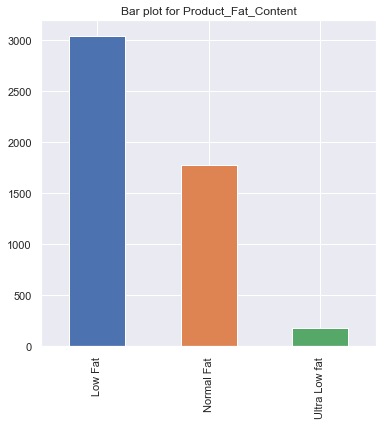

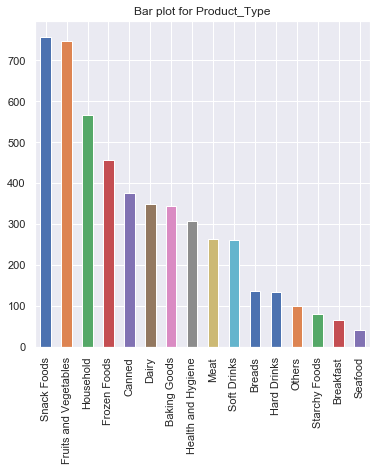

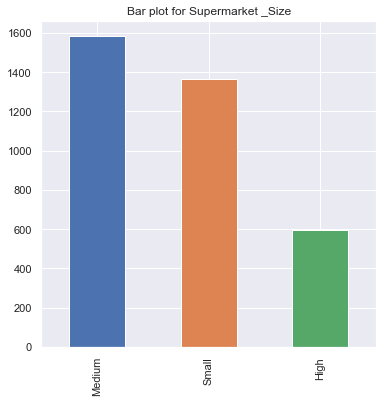

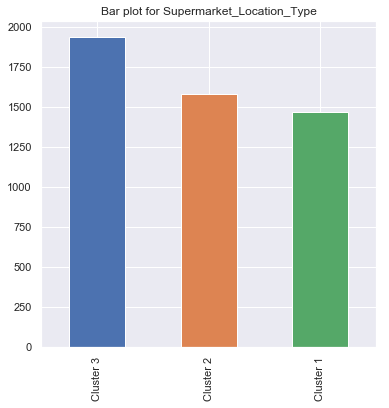

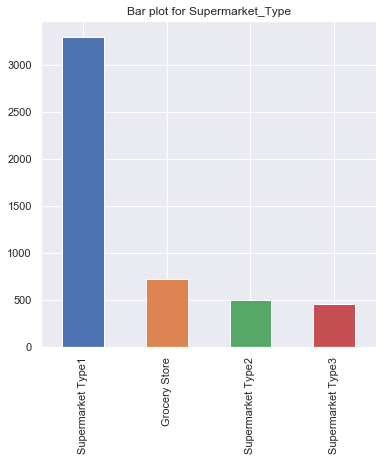

In [100]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)



# Scatter plot for Numerical Features

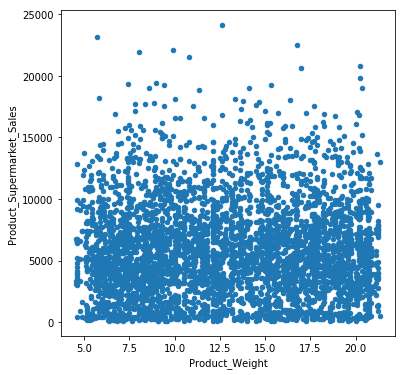

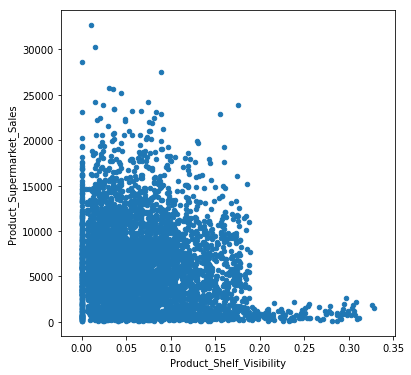

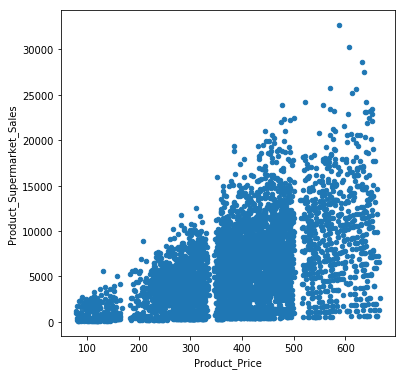

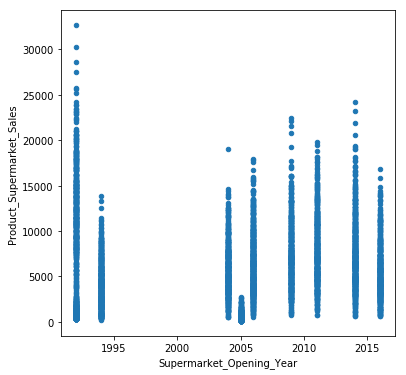

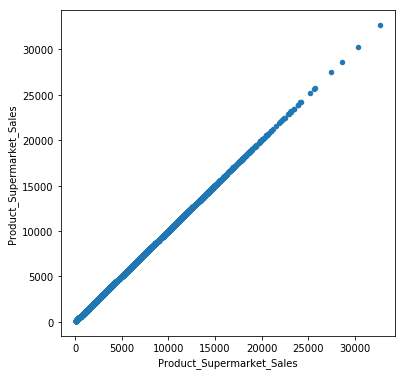

In [13]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    newdata.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)


### BOX PLOTS OF CATEGORICAL COLUMNS AGAINST TARGET COLUMN

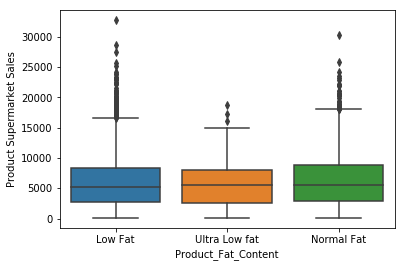

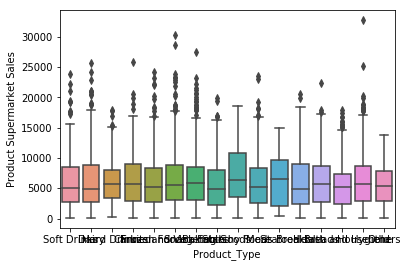

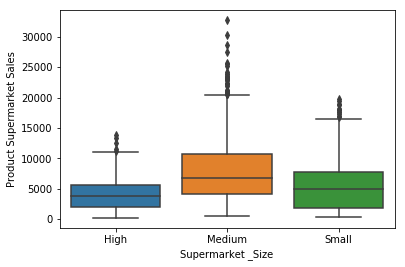

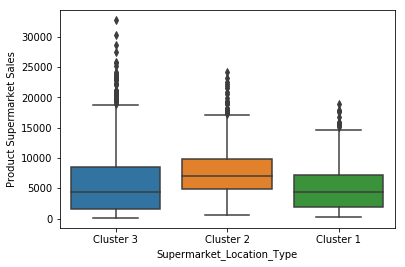

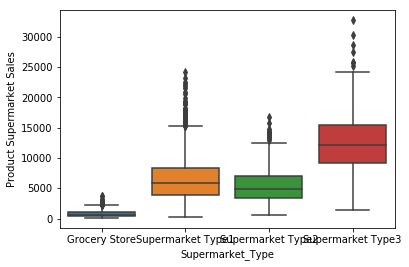

In [14]:
for col in cat_cols:
    sns.boxplot(col, 'Product_Supermarket_Sales', data=newdata)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
  

### PAIR PLOT OF COLUMNS WITHOUT MISSING VALUES

<Figure size 432x288 with 0 Axes>

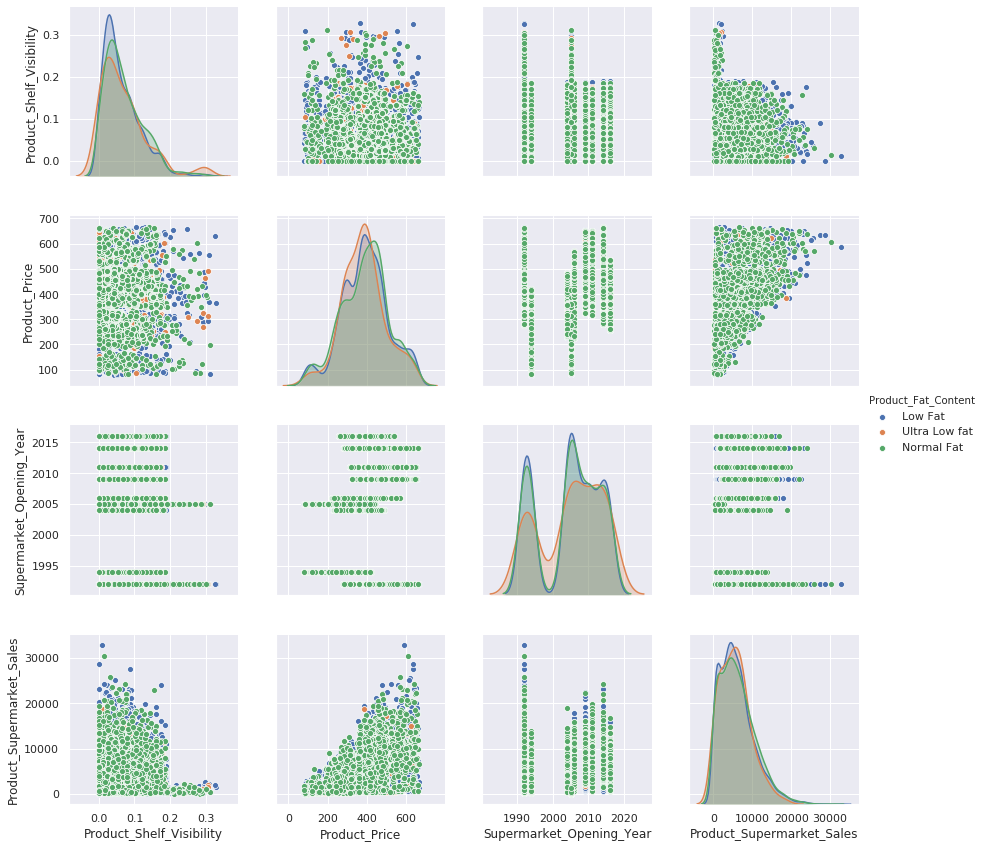

<Figure size 432x288 with 0 Axes>

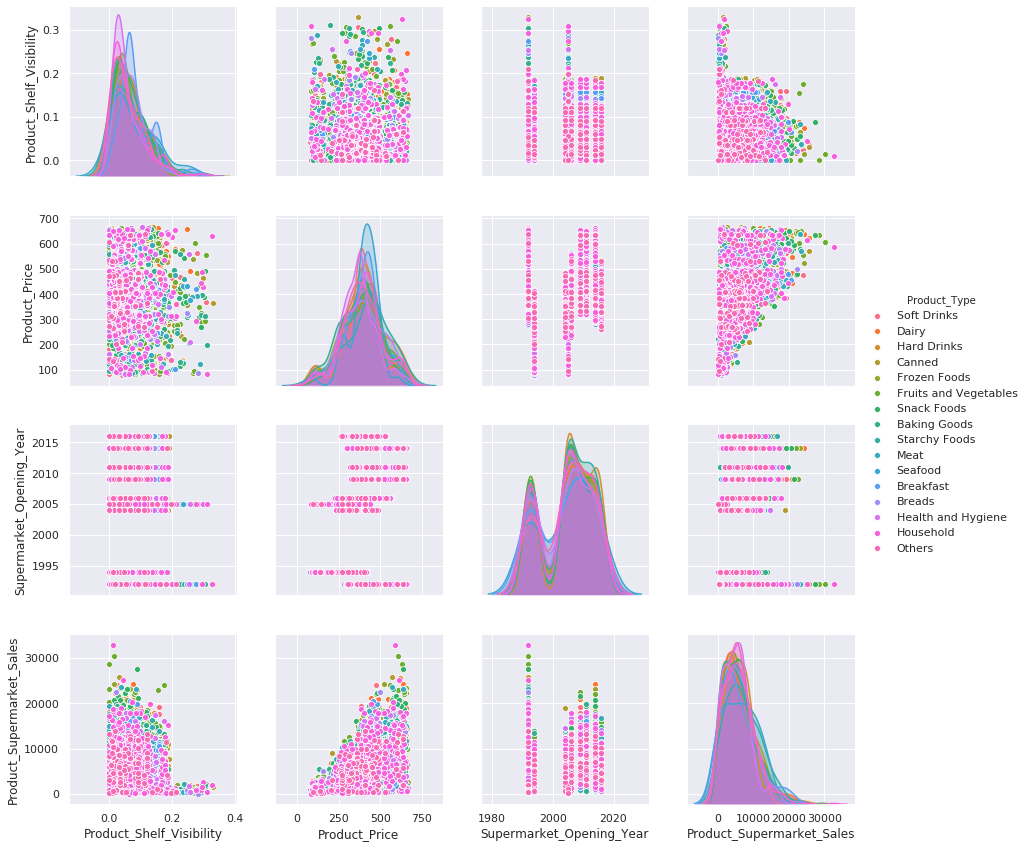

<Figure size 432x288 with 0 Axes>

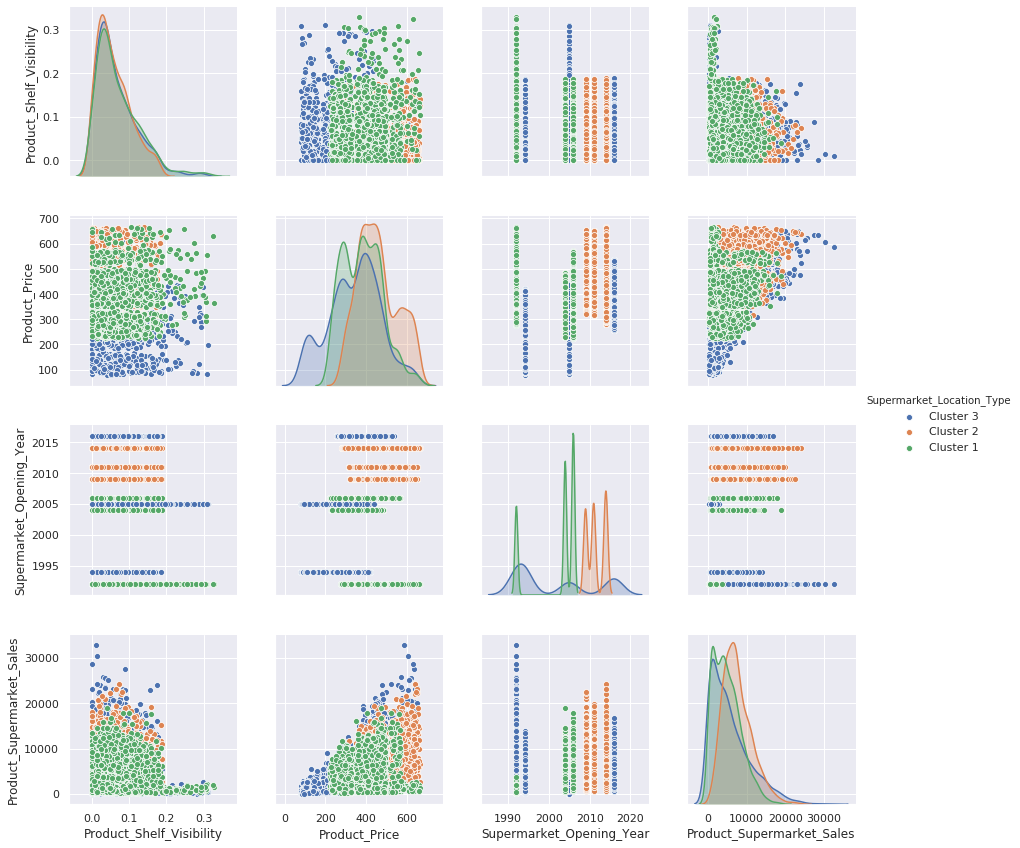

/home/rising/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/rising/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x288 with 0 Axes>

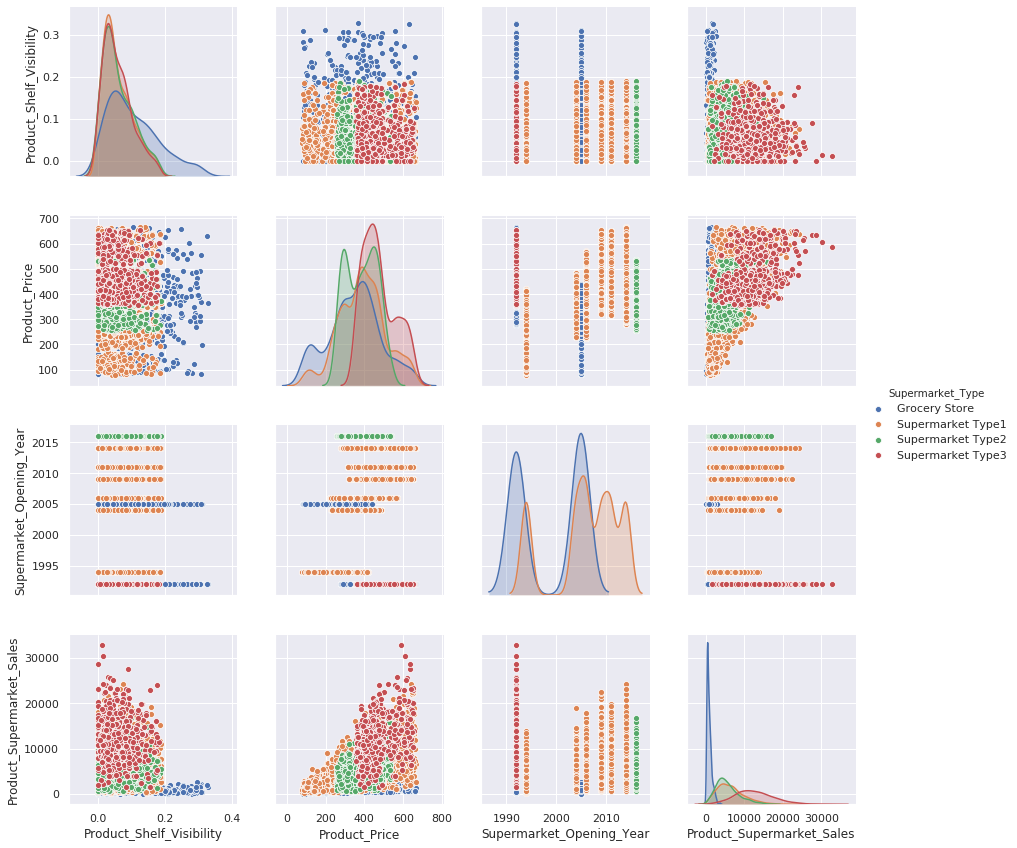

In [13]:
cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type', 'Supermarket_Type' ]

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(newdata[cols_2_pair], height=3.0, hue=col)
    plt.show()

## FEATURE ENGINEERING

### 1. New Feature Creation

When exploring our data, we proposed to create some new features. 

The first feature was a Boolean class to separate Normal Fat from the other classes. Let's do that below.

In [9]:
#print out all unique values
newdata['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [10]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
newdata['is_normal_fat'] = newdata['Product_Fat_Content'].map(fat_content_dict)
#Preview the values
newdata['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

Another feature we'll create is a column that captures the year of opening. This feature will separate Supermarket_Opening_Year into the 90s and 2000s.

In [11]:
#Assign year 2000 and above as 1, 1996 and below as 0

def cluster_open_year(year):
    if year <= 1996:
        return 0
    else:
        return 1
    
newdata['open_in_the_2000s'] = newdata['Supermarket_Opening_Year'].apply(cluster_open_year)

In [12]:
#Preview created feature
newdata[['Supermarket_Opening_Year', 'open_in_the_2000s']].head(4)

Supermarket_Opening_Year  open_in_the_2000s
0                      2005                  1
1                      1994                  0
2                      2014                  1
3                      2016                  1

Another feature we will create is one that groups the  Product type into 2 classes. class 1 will hold Household, Health Hygiene and others categories while class 0 will hold the remaining categories.

In [13]:
#Get the unique categories in the column as a list
prod_type_cats = list(newdata['Product_Type'].unique())
#remove the class 1 categories
prod_type_cats.remove('Health and Hygiene')
prod_type_cats.remove('Household')
prod_type_cats.remove('Others')

def cluster_prod_type(product):
    if product in prod_type_cats:
        return 0
    else:
        return 1
newdata['Product_type_cluster'] = newdata['Product_Type'].apply(cluster_prod_type)

In [14]:
newdata[['Product_Type', 'Product_type_cluster']].tail(10)

Product_Type  Product_type_cluster
4980  Health and Hygiene                     1
4981  Health and Hygiene                     1
4982  Health and Hygiene                     1
4983           Household                     1
4984           Household                     1
4985           Household                     1
4986           Household                     1
4987           Household                     1
4988           Household                     1
4989           Household                     1

### Transforming skewed features

During our EDA, we identified that Product_Supermarket_Sales and Product_Shelf_Visibility where right skewed, and we proposed to log transform them into a normal distribution.

Text(0.5, 1, 'Transformation of Product_Supermarket_Sales feature')

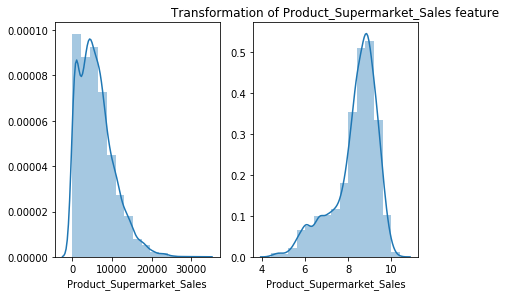

In [15]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Supermarket_Sales'] = np.log1p(newdata['Product_Supermarket_Sales'])
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Supermarket_Sales feature")

__Next, let's transform Product_Shelf_Visibility__

Text(0.5, 1, 'Transformation of Product_Shelf_Visibility feature')

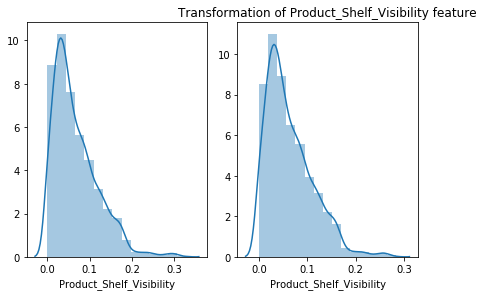

In [16]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Shelf_Visibility'] = np.log1p(newdata['Product_Shelf_Visibility'])
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Shelf_Visibility feature")

There's no significant change in this feature when we apply the Log transform. This is because the values are mostly close to zero. There exist advance ways we could use to transform features like this, but we'll stick with this in this post. Interested readers can find advanced methods here.

### HANDLING CATEGORICAL FEATURES

Next we''ll handle all categorical columns, but first I'll explain some important concepts that'll help us here.

__Categorical Encoding, what is it?__

Categorical variables are used to represent categories or classes. For instance the Product_Type column in our data set is a categorical variable with 3 classes (Low Fat, Ultra Low Fat and Normal Fat).

Categorical encodings are methods used to to turn non numerical features/variables to numbers. There are various ways to perform categorical encoding but it may depend on the type of categorical variable we're dealing with. 

The two categorical types we usually consider before doing encodings are ordinal and nonordinal/nominal categories. 

Understanding the difference between these two types is important before picking an encoding scheme. Let's understand them first.

__Ordinal Categoricals:__ These are categories that can be ordered in sequence of magnitude. i.e we can arrange the classes in such a way that one class can have a greater magnitude than the other. 
For instance the feature SuperMarket_Size in our dataset is an ordinal categorical because the class label High is greater than Medium which in turn is greater than Small. So if we encode these features, we should definitely assign a greater class number to the High class.

__{High : 3, Medium: 2, Small: 1}__

__Nonordinal Categoricals__ These categories have no meaningful difference in magnitude. i.e one class label is not greater than the other. For Instance, in the feature Product_Type, Soft drink is not greater than Household, nor is the Health and Hygiene class greater than the Diary class.

##### NOW LET'S TALK ABOUT SOME TYPES OF ENCODING
Encoding for categorical features with small number of classes, typically less than 15

__One-Hot Encoding:__ In one hot encoding, we use a group of bits to represent a class, where only one class can be activated at a specific time. Consider the feature Supermarket_Location_Type in our data set, this feature has three classes (cluster 1, cluster 2 and cluster 3). We can one-hot encode this feature using three bits as shown below.

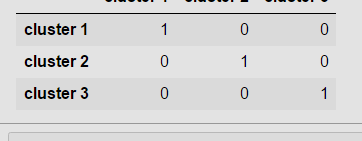

Here, we can see that we used 3 bits where one and only one class can be activated at a time. 



__Dummy Encoding:__ Dummy encoding is the same as One-Hot Encoding, the only difference is that in dummy encoding, we use one less bit than One-Hot encoding. I.e, we have a class with all zero bit. The difference is subtle and both methods can be used interchangeably.

__Encoding for categorical features with large number of classes, typically greater than 15__

__Label Encoding:__ In Label Encoding, we simply assign integers, say 1 to n (n = number of classes) to each category. This usually result in an order-able feature.

__Note:__ Some Machine Learning models like Tree or Linear Models can perform well with this type of encoding because trees do not work with magnitudes of data points. But this would affect Neural Nets and Distance based models like KNN which take into consideration the magnitude of data points.

Other Advance but effective encoding schemes are Embeddings, Feature Hashing and Bin Counting.

#### ENCODING OF FEATURES

In [17]:
for col in cat_cols:
    print('Value Count for', col)
    print(newdata[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dt

Now, looking at our features, the column with the highest number of classes is the Product_Type column (15). In this case we can use the one-hot-encoding scheme since our data is small (approx 5000) and the unique categories are also small.

Use the pandas get_dummies function when working smaller categories__

In [18]:
#save the target value to a new variable
y_target = newdata['Product_Supermarket_Sales']
newdata.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

#one hot encode using pandas dummy function
dummified_data = pd.get_dummies(newdata)
dummified_data.head()

Product_Weight  Product_Shelf_Visibility  Product_Price  \
0            11.6                  0.066289         357.54   
1            11.6                  0.040097         355.79   
2            11.6                  0.040352         350.79   
3            11.6                  0.040290         355.04   
4            11.6                  0.000000         354.79   

   Supermarket_Opening_Year  is_normal_fat  open_in_the_2000s  \
0                      2005              0                  1   
1                      1994              0                  0   
2                      2014              0                  1   
3                      2016              0                  1   
4                      2011              0                  1   

   Product_type_cluster  Product_Fat_Content_Low Fat  \
0                     0                            1   
1                     0                            1   
2                     0                            1   
3                     0                            1   
4                     0                            0   

   Product_Fat_Content_Normal Fat  Product_Fat_Content_Ultra Low fat  ...  \
0                               0                                  0  ...   
1                               0                                  0  ...   
2                               0                                  0  ...   
3                               0                                  0  ...   
4                               0                                  1  ...   

   Supermarket _Size_High  Supermarket _Size_Medium  Supermarket _Size_Small  \
0                       0                         0                        0   
1                       1                         0                        0   
2                       0                         0                        0   
3                       0                         1                        0   
4                       0                         0                        1   

   Supermarket_Location_Type_Cluster 1  Supermarket_Location_Type_Cluster 2  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    1   
3                                    0                                    0   
4                                    0                                    1   

   Supermarket_Location_Type_Cluster 3  Supermarket_Type_Grocery Store  \
0                                    1                               1   
1                                    1                               0   
2                                    0                               0   
3                                    1                               0   
4                                    0                               0   

   Supermarket_Type_Supermarket Type1  Supermarket_Type_Supermarket Type2  \
0                                   0                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   0                                   1   
4                                   1                                   0   

   Supermarket_Type_Supermarket Type3  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 36 columns]

## Fill in Missing Values

Print out columns with missing values

In [19]:
dummified_data.shape

(4990, 36)

In [20]:
#Print null columns
dummified_data.isnull().sum()

Product_Weight                         802
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket_Opening_Year                 0
is_normal_fat                            0
open_in_the_2000s                        0
Product_type_cluster                     0
Product_Fat_Content_Low Fat              0
Product_Fat_Content_Normal Fat           0
Product_Fat_Content_Ultra Low fat        0
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Type_Seafood                     0
Product_Typ

In [21]:
# Compute the mean
mean_pw = dummified_data['Product_Weight'].mean()
#Fill the missing values with calculated mean
dummified_data['Product_Weight'].fillna(mean_pw, inplace=True)

In [22]:
#Check if filling is successful
dummified_data.isnull().sum()

Product_Weight                         0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket_Opening_Year               0
is_normal_fat                          0
open_in_the_2000s                      0
Product_type_cluster                   0
Product_Fat_Content_Low Fat            0
Product_Fat_Content_Normal Fat         0
Product_Fat_Content_Ultra Low fat      0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Snack Foods               0
Product_Type_Sof

## PERFORM FEATURE NORMALIZATION/ SCALING

In [23]:
from sklearn.preprocessing import RobustScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

X_train = scaler.fit_transform(dummified_data) 

### MODELLING

The models compared in this study (Multiple Linear Regression, Gradient Boosting and Random Forest) have been used for numerous problems in different forecasting task and have been chosen based on their popularity in industry. 

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score,validation_curve,learning_curve


def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='neg_mean_absolute_error'))
    return score

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


knn_model = KNeighborsRegressor(n_neighbors=60)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=2)
gb_model = GradientBoostingRegressor(n_estimators=500, max_depth=6, max_features='sqrt', min_samples_split=4, random_state=2)


In [51]:
model_names = ['KNN', "RF", "GB"]
models = [knn_model, rf_model, gb_model]
result_dict = {}
mae_cv = []
std_cv = []

for name, model in zip(model_names, models):
    res = cross_validate(model, 10, X_train, y_target)
    mae_cv.append(np.mean(res))
    std_cv.append(np.std(res))
    
    print("Cross validation metric for {}".format(name))
    print(np.mean(res))
    print(np.std(res))
 

Cross validation metric for KNN
0.42510260925307675
0.018007794536035057
Cross validation metric for RF
0.40917763222445014
0.01584227988601245
Cross validation metric for GB
0.42826029120273396
0.014420405530076586


In [61]:
result_dict['Models'] = model_names
result_dict['MAE'] = mae_cv
result_dict['STD'] = std_cv

pd.DataFrame(result_dict, columns=['Models', 'MAE', 'STD']).set_index('Models')

MAE       STD
Models                    
KNN     0.425103  0.018008
RF      0.409178  0.015842
GB      0.428260  0.014420

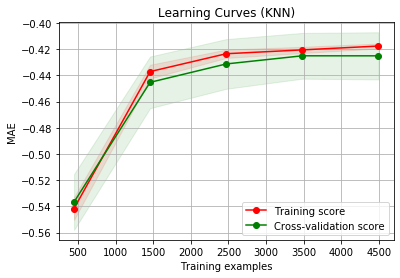

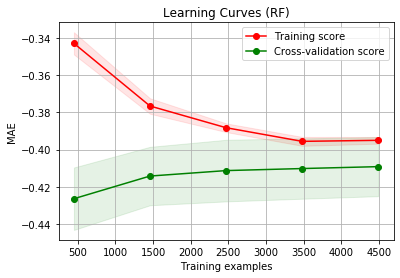

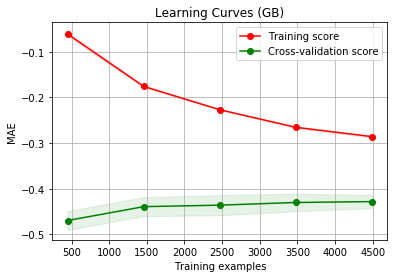

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("MAE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,scoring='neg_mean_absolute_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('{}.png'.format(title))
    return plt


title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = KFold(n_splits=10,random_state=0)

plot_learning_curve(knn_model, title, X_train, y_target, cv=cv, n_jobs=-1)

title = r"Learning Curves (RF)"
plot_learning_curve(rf_model, title, X_train, y_target, cv=cv, n_jobs=-1)

title = r"Learning Curves (GB)"
plot_learning_curve(gb_model, title, X_train, y_target, cv=cv, n_jobs=-1)

plt.show()

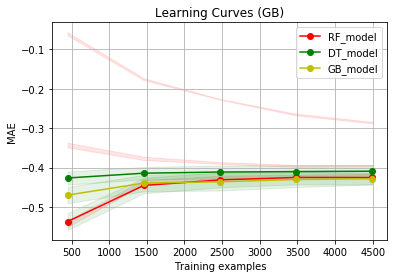

In [71]:

def plot_learning_curve(estimator, title, X, y, ylim=(None), cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), c='r', label=''):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
#     plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("MAE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,scoring='neg_mean_absolute_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, test_scores_mean, 'o-', color=c,
             label=label)

    plt.legend(loc="best")
    return plt


title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = KFold(n_splits=10,random_state=0)

plot_learning_curve(knn_model, title, X_train, y_target, cv=cv, n_jobs=-1, c='r', label='RF_model')

title = r"Learning Curves (RF)"
plot_learning_curve(rf_model, title, X_train, y_target, cv=cv, n_jobs=-1, c='g', label='DT_model')

title = r"Learning Curves (GB)"
plot_learning_curve(gb_model, title, X_train, y_target, cv=cv, n_jobs=-1,  c='y', label='GB_model')

plt.savefig('learncurve_3.png')
plt.show()

#### PLOTTING FEATURE IMPORTANCE

In [62]:
def plot_importance(df, fig_name=''):
    #Sort values by index
    df = df.sort_values('importance', ascending = False).reset_index()
    #Normalize between 0 and 1
    df['importance'] = df['importance'] / df['importance'].sum()
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (15, 10))
    ax = plt.subplot()
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:10]))), 
            df['importance'].head(10), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:10]))))
    ax.set_yticklabels(df['feature'].head(10))
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.savefig('{}.png'.format(fig_name))
    plt.show()

Feature Importance for RF


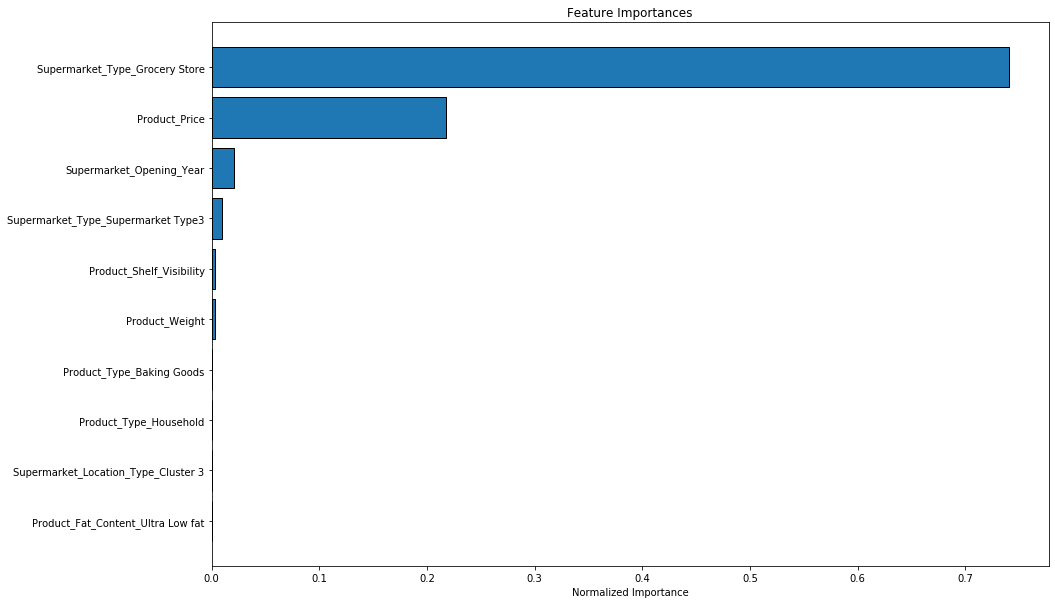

Feature Importance for GB


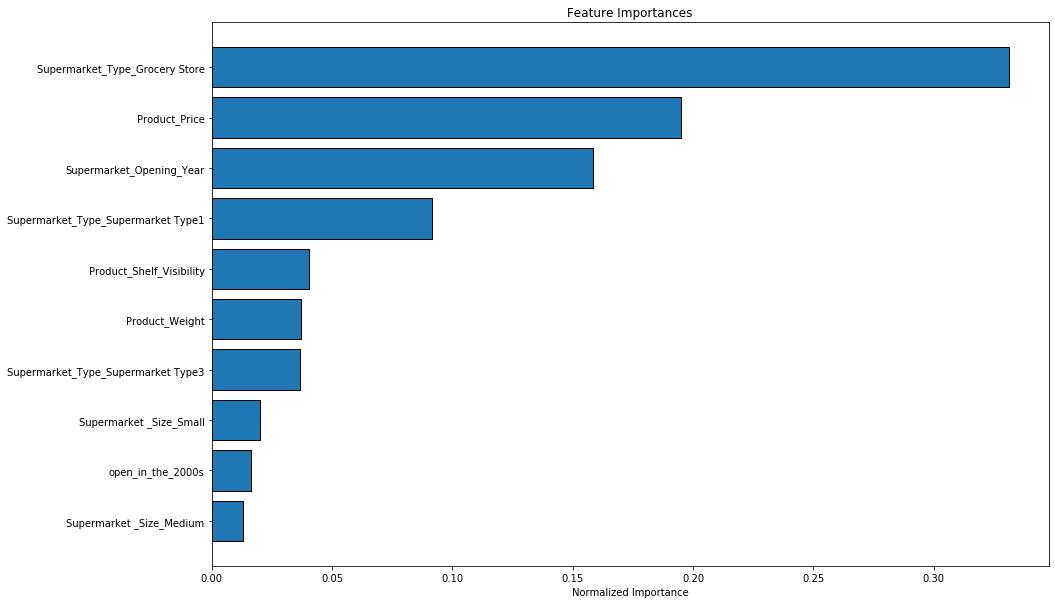

In [65]:
#fit models and plot importance

for name, model in zip(model_names, models):
    if name is 'KNN':
        pass
    else:  
        model.fit(X_train, y_target)
        print("Feature Importance for {}".format(name))
        cols = dummified_data.columns
        importances = model.feature_importances_

        feat_import = pd.DataFrame({'feature': cols, 'importance': importances})
        fig_name = 'imp' + name
        plot_importance(feat_import, fig_name=fig_name)